In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from dispertrack.model.analyze_waterfall import AnalyzeWaterfall
from dispertrack.model.displacement import msd_iter
from dispertrack.model.util import H, r_d, d_r

In [4]:
%reload_ext dispertrack

In [204]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy
from scipy.optimize import minimize, root_scalar
import scipy as sp

In [6]:
data = pathlib.Path.home() / pathlib.Path('Data/Waterfall_70nm_1.h5')
if not data.is_file():
    raise Exception('File Not Found')

In [245]:
analysis = AnalyzeWaterfall()
analysis.load_waterfall(data)

In [246]:
analysis.waterfall.shape

(1936, 135404)

In [247]:
analysis.meta['frames']

118470

In [ ]:
plt.figure(figsize=(13, 25))
plt.imshow(analysis.waterfall[:, 10000:30000].T, cmap='Reds')

In [248]:
analysis.crop_waterfall(10000, 90000)

In [249]:
analysis.calculate_background(sigma=10)

In [250]:
analysis.denoise()

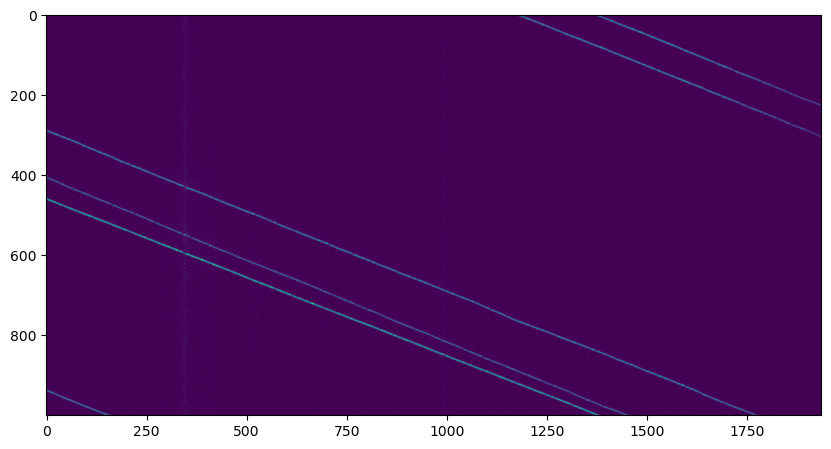

In [251]:
plt.figure(figsize=(10, 20))
plt.imshow(analysis.corrected_data[:, :1000].T)

In [252]:
analysis.calculate_mask(threshold=50, min_size=100, max_gap=100)

In [253]:
analysis.label_mask(min_len=100)

In [254]:
analysis.analyze_traces()

Using 4.4e-07m/px as calibration


/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Docum

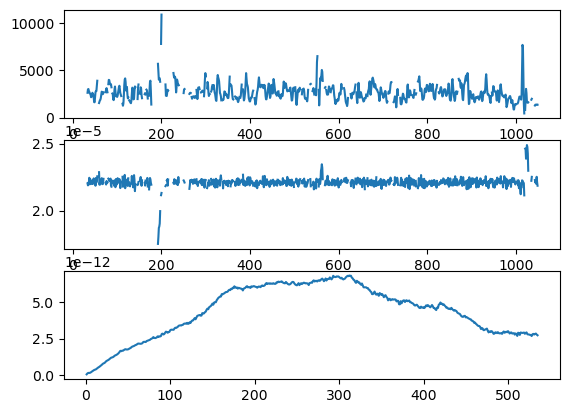

In [258]:
fig, ax = plt.subplots(3)
ax[0].plot(analysis.pcle_data[51]['intensity'])
ax[1].plot(analysis.pcle_data[51]['position'])
ax[2].plot(analysis.pcle_data[51]['MSD']['MSD'])

In [259]:
analysis.calculate_particle_properties()

Problem with pcle 12
Problem with pcle 38
Problem with pcle 46
Problem with pcle 47
Problem with pcle 67
Problem with pcle 77
Problem with pcle 89
Problem with pcle 93
Problem with pcle 106
Problem with pcle 107
Problem with pcle 117
Problem with pcle 119
133
1               NaN
2               NaN
3               NaN
4      9.403190e-15
5      3.454376e-14
           ...     
197             NaN
198             NaN
199             NaN
200    1.406848e-11
201             NaN
Name: MSD, Length: 201, dtype: float64
138
1               NaN
2               NaN
3      1.108878e-10
4               NaN
5               NaN
           ...     
219             NaN
220             NaN
221             NaN
222             NaN
223             NaN
Name: MSD, Length: 223, dtype: float64
Problem with pcle 151
Problem with pcle 156
Problem with pcle 161
Problem with pcle 174
181
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6     5.339297e-13
7           

/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/analyze_waterfall.py:347: RuntimeWarning: divide by zero encountered in double_scalars
  except:
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/analyze_waterfall.py:347: RuntimeWarning: divide by zero encountered in double_scalars
  except:
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/analyze_waterfall.py:347: RuntimeWarning: divide by zero encountered in double_scalars
  except:
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/analyze_waterfall.py:347: RuntimeWarning: divide by zero encountered in double_scalars
  except:
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/analyze_waterfall.py:347: RuntimeWarning: divide by zero encountered in double_scalars
  except:


In [260]:
radiuses = [analysis.pcle_data[i].get('r', np.nan) for i in analysis.pcle_data.keys()]
intensities = [analysis.pcle_data[i].get('mean_intensity', np.nan) for i in analysis.pcle_data.keys()]

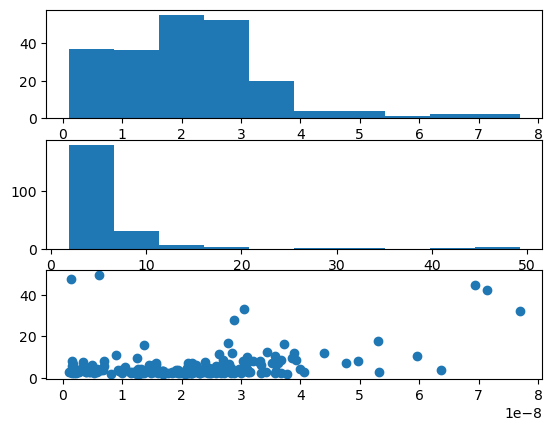

In [ ]:
fig, ax = plt.subplots(3)
ax[0].hist(radiuses)
ax[1].hist(intensities)
ax[2].plot(radiuses, intensities, 'o')

(array([37., 36., 55., 52., 20.,  4.,  4.,  1.,  2.,  2.]),
 array([1.01176322e-09, 8.60468286e-09, 1.61976025e-08, 2.37905222e-08,
        3.13834418e-08, 3.89763615e-08, 4.65692811e-08, 5.41622007e-08,
        6.17551204e-08, 6.93480400e-08, 7.69409597e-08]),
 <BarContainer object of 10 artists>)

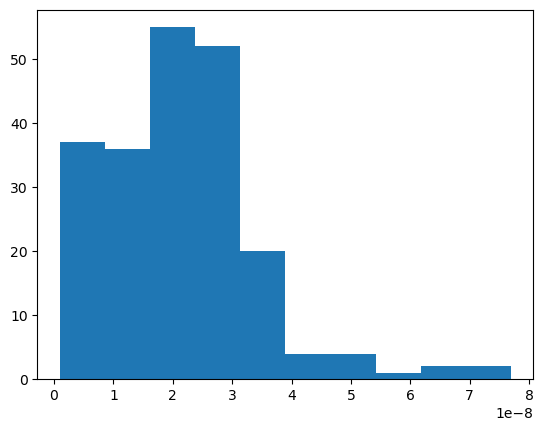

In [ ]:
plt.hist(radiuses)

In [268]:
sliced_data = analysis.calculate_slice_from_label(analysis.filtered_props[22], 15)

In [269]:
sliced_data[:30,:30]

array([[1.00000000e+00,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan],
       [2.00000000e+00,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,

In [ ]:
intensities, positions = analysis.calculate_intensities_cropped(sliced_data[:, 1:], 20, 7, 25)

/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:39: UserWarning: All local maxima were in the margins.
  warnings.warn("All local maxima were in the margins.", UserWarning)


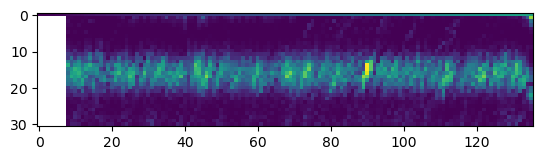

In [267]:
plt.imshow(sliced_data.T)

In [238]:
analysis.meta['calibration'] = 0.4E-6
analysis.analyze_traces()

Using 4e-07m/px as calibration


/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/find.py:30: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)
/Users/aquiles/Docum

In [240]:
analysis.calculate_particle_properties()

Problem with pcle 12
Problem with pcle 38
Problem with pcle 46
Problem with pcle 47
Problem with pcle 67
Problem with pcle 77
Problem with pcle 89
Problem with pcle 93
Problem with pcle 106
Problem with pcle 107
Problem with pcle 117
Problem with pcle 119
133
1               NaN
2               NaN
3               NaN
4      7.771231e-15
5      2.854856e-14
           ...     
197             NaN
198             NaN
199             NaN
200    1.162684e-11
201             NaN
Name: MSD, Length: 201, dtype: float64
138
1               NaN
2               NaN
3      9.164278e-11
4               NaN
5               NaN
           ...     
219             NaN
220             NaN
221             NaN
222             NaN
223             NaN
Name: MSD, Length: 223, dtype: float64
Problem with pcle 151
Problem with pcle 174
181
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6     4.412642e-13
7              NaN
8              NaN
9              NaN

/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/analyze_waterfall.py:343: RuntimeWarning: divide by zero encountered in double_scalars
  return d_r(X) - fit[0] / H(X, C)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/analyze_waterfall.py:343: RuntimeWarning: divide by zero encountered in double_scalars
  return d_r(X) - fit[0] / H(X, C)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/analyze_waterfall.py:343: RuntimeWarning: divide by zero encountered in double_scalars
  return d_r(X) - fit[0] / H(X, C)
/Users/aquiles/Documents/Dispertech/Programs/DisperTrack/dispertrack/model/analyze_waterfall.py:343: RuntimeWarning: divide by zero encountered in double_scalars
  return d_r(X) - fit[0] / H(X, C)


In [243]:
d = [2*analysis.pcle_data[i].get('r', np.nan) for i in analysis.pcle_data.keys()]
i = [analysis.pcle_data[i].get('mean_intensity', np.nan) for i in analysis.pcle_data.keys()]
i = np.power(i, 1/6)

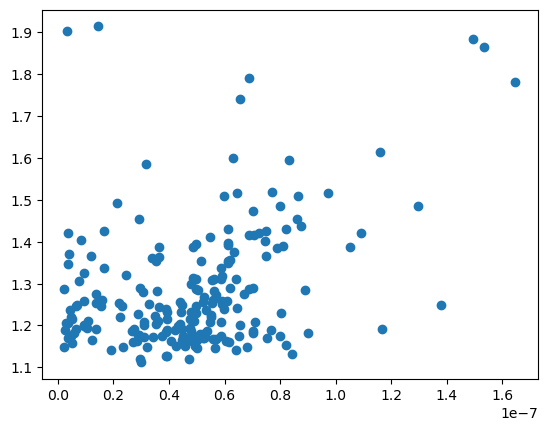

In [244]:
plt.plot(d, i, 'o')
plt.show()

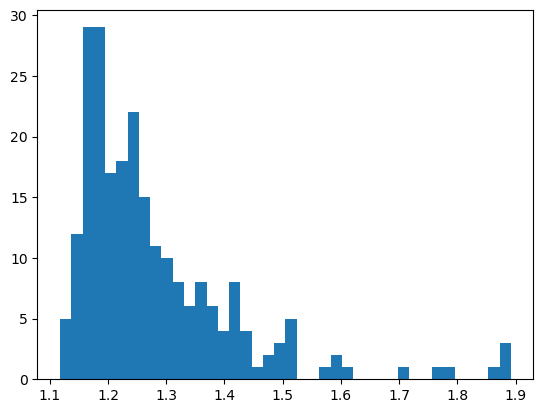

In [236]:
plt.hist(i, 40)
plt.show()

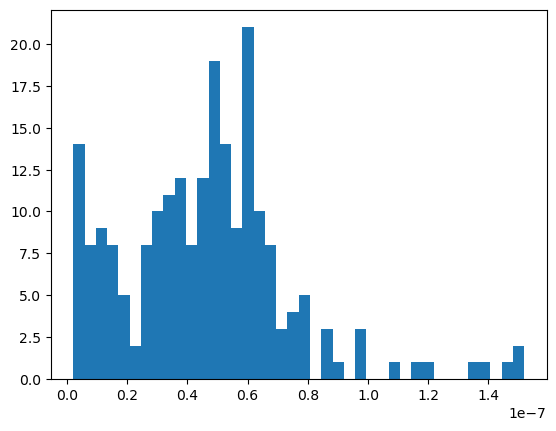

In [237]:
plt.hist(d, 40)
plt.show()